In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
df = pd.read_csv("Train.csv")

print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (1000, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Flight,2,5,306,6,high,M,45,3838,1
1,2,F,Ship,7,2,114,3,high,M,35,2710,1
2,3,B,Ship,7,2,215,7,medium,F,44,4152,0
3,4,A,Road,5,3,126,5,medium,M,54,2245,0
4,5,F,Ship,3,5,113,3,medium,M,43,1806,1


In [ ]:
df.drop(['ID'], axis=1, inplace=True)

print("After Dropping ID:")
display(df.head())

After Dropping ID:


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,C,Flight,2,5,306,6,high,M,45,3838,1
1,F,Ship,7,2,114,3,high,M,35,2710,1
2,B,Ship,7,2,215,7,medium,F,44,4152,0
3,A,Road,5,3,126,5,medium,M,54,2245,0
4,F,Ship,3,5,113,3,medium,M,43,1806,1


In [ ]:
max_rating = 5

df['rating_sin'] = np.sin(2 * np.pi * df['Customer_rating'] / max_rating)
df['rating_cos'] = np.cos(2 * np.pi * df['Customer_rating'] / max_rating)

print("Cyclic Encoding Applied:")
display(df[['Customer_rating', 'rating_sin', 'rating_cos']].head())

Cyclic Encoding Applied:


,Customer_rating,rating_sin,rating_cos
0,5,-2.449294e-16,1.000000
1,2,5.877853e-01,-0.809017
2,2,5.877853e-01,-0.809017
3,3,-5.877853e-01,-0.809017
4,5,-2.449294e-16,1.000000


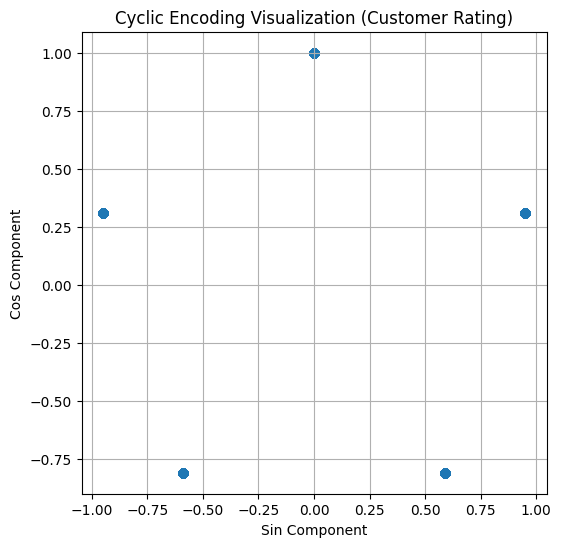

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['rating_sin'], df['rating_cos'])
plt.title("Cyclic Encoding Visualization (Customer Rating)")
plt.xlabel("Sin Component")
plt.ylabel("Cos Component")
plt.grid(True)
plt.show()

In [ ]:
df.drop('Customer_rating', axis=1, inplace=True)

print("After Dropping Original Rating Column:")
display(df.head())

After Dropping Original Rating Column:


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,rating_sin,rating_cos
0,C,Flight,2,306,6,high,M,45,3838,1,-2.449294e-16,1.000000
1,F,Ship,7,114,3,high,M,35,2710,1,5.877853e-01,-0.809017
2,B,Ship,7,215,7,medium,F,44,4152,0,5.877853e-01,-0.809017
3,A,Road,5,126,5,medium,M,54,2245,0,-5.877853e-01,-0.809017
4,F,Ship,3,113,3,medium,M,43,1806,1,-2.449294e-16,1.000000


In [ ]:
bin_cols = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']

print("Before Discretization:")
display(df[bin_cols].head())

Before Discretization:


,Cost_of_the_Product,Weight_in_gms,Discount_offered
0,306,3838,45
1,114,2710,35
2,215,4152,44
3,126,2245,54
4,113,1806,43


In [ ]:
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

df[bin_cols] = kbins.fit_transform(df[bin_cols])

print("After Discretization (0–3 bins):")
display(df[bin_cols].head())

After Discretization (0–3 bins):


,Cost_of_the_Product,Weight_in_gms,Discount_offered
0,3.0,2.0,2.0
1,0.0,1.0,2.0
2,2.0,2.0,2.0
3,0.0,0.0,3.0
4,0.0,0.0,2.0


In [ ]:
print("Final Dataset Shape:", df.shape)
display(df.head())

Final Dataset Shape: (1000, 12)


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,rating_sin,rating_cos
0,C,Flight,2,3.0,6,high,M,2.0,2.0,1,-2.449294e-16,1.000000
1,F,Ship,7,0.0,3,high,M,2.0,1.0,1,5.877853e-01,-0.809017
2,B,Ship,7,2.0,7,medium,F,2.0,2.0,0,5.877853e-01,-0.809017
3,A,Road,5,0.0,5,medium,M,3.0,0.0,0,-5.877853e-01,-0.809017
4,F,Ship,3,0.0,3,medium,M,2.0,0.0,1,-2.449294e-16,1.000000
